### `Loading the Dataset`

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1gmiFCYLkRJYKOlLaUOWK0obUnWj95dY7")

In [9]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

### `Feature Engineering`

In [ ]:
import numpy as np

df["Hydrology_Distance"] = np.sqrt(df["Horizontal_Distance_To_Hydrology"]**2 + df["Vertical_Distance_To_Hydrology"]**2)
df["Road_Fire_Interaction"] = df["Horizontal_Distance_To_Roadways"] - df["Horizontal_Distance_To_Fire_Points"]
df["Hillshade_Mean"] = (df["Hillshade_9am"] + df["Hillshade_Noon"] + df["Hillshade_3pm"]) / 3
df["Elevation_Slope"] = df["Elevation"] * df["Slope"]

In [ ]:
numerical = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
              'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm','Horizontal_Distance_To_Fire_Points',
              'Hydrology_Distance','Road_Fire_Interaction','Hillshade_Mean','Elevation_Slope']

### `Numerical Features Visualisation`

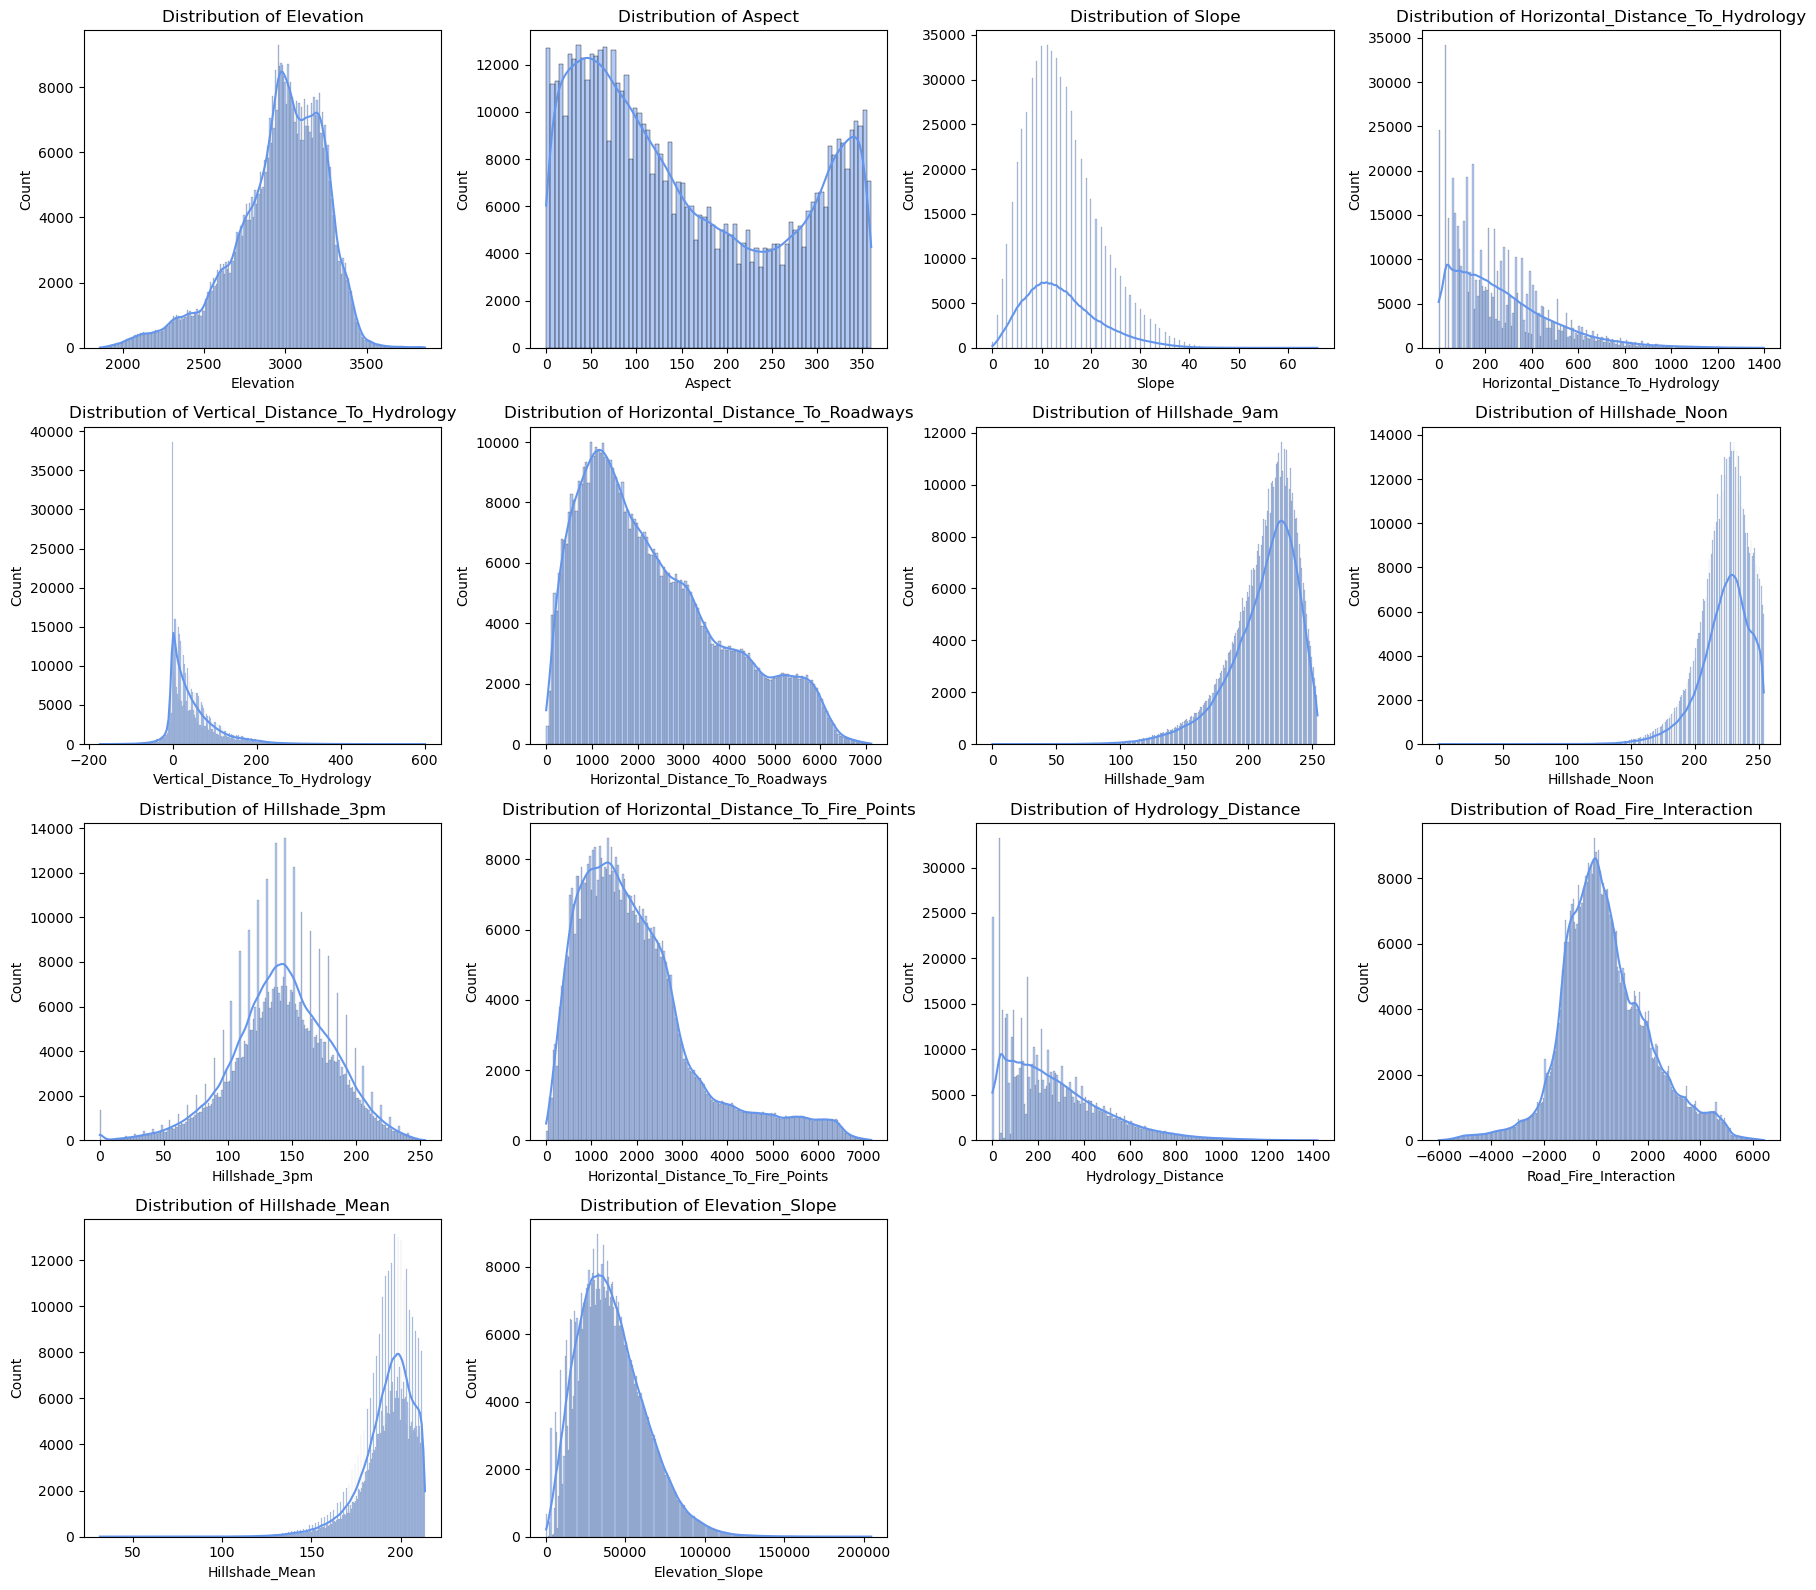

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 16))

for i, col in enumerate(numerical, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, color='cornflowerblue')
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

### `Target Variable`

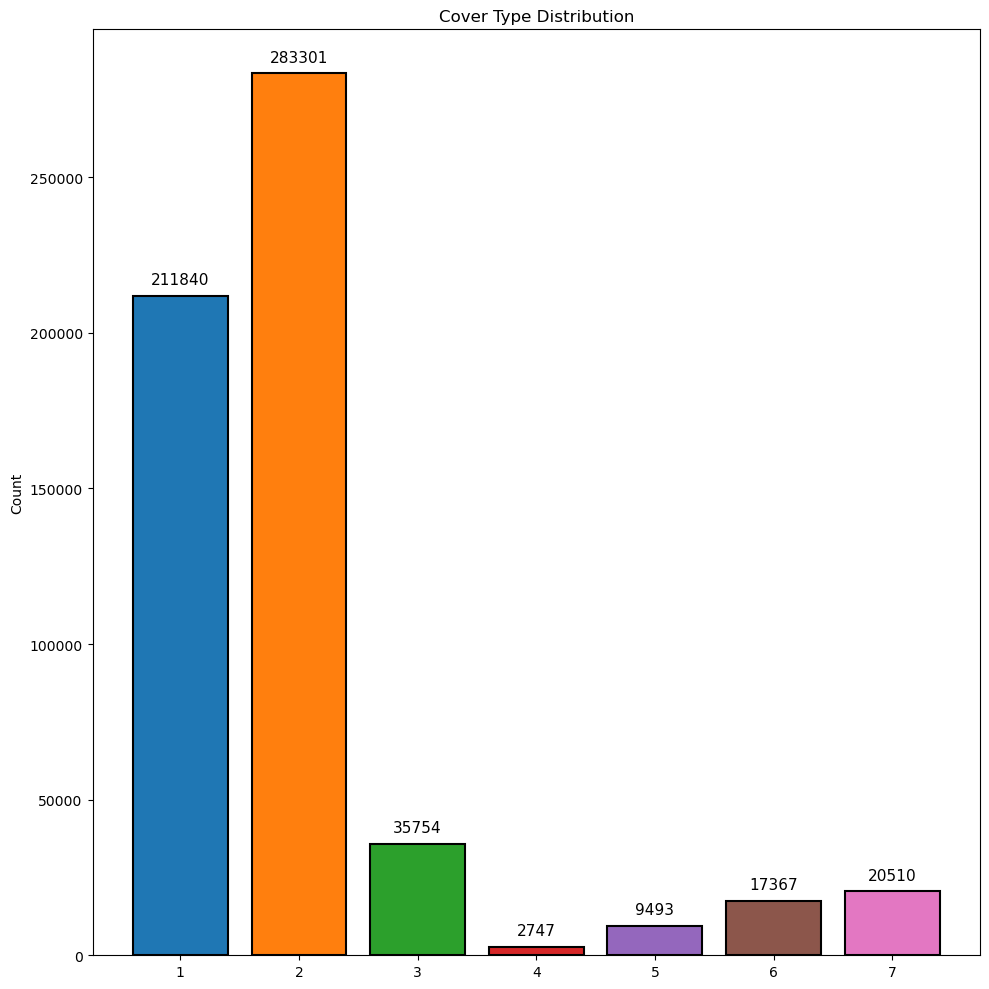

In [ ]:
import matplotlib.pyplot as plt
counts = df['Cover_Type'].value_counts().sort_index()
colors = plt.cm.tab10.colors
plt.figure(figsize=(10,10))

bars = plt.bar(
    counts.index.astype(str),
    counts.values,
    color=colors[:len(counts)],
    edgecolor='black',
    linewidth=1.5
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + max(counts.values)*0.01,
        str(height),
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.ylabel("Count")
plt.title("Cover Type Distribution")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### `Numerical Variable`

In [ ]:
df[numerical].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Hydrology_Distance,Road_Fire_Interaction,Hillshade_Mean,Elevation_Slope
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,276.065482,369.855385,192.664343,41229.175564
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,217.047653,1677.946848,14.465670,21159.122421
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6017.000000,31.666667,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,108.461975,-706.000000,185.666667,25600.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,229.477668,166.000000,195.333333,38597.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,393.814677,1337.000000,203.000000,54108.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,1418.916840,6428.000000,213.666667,204880.000000


### `Correlation Plot`

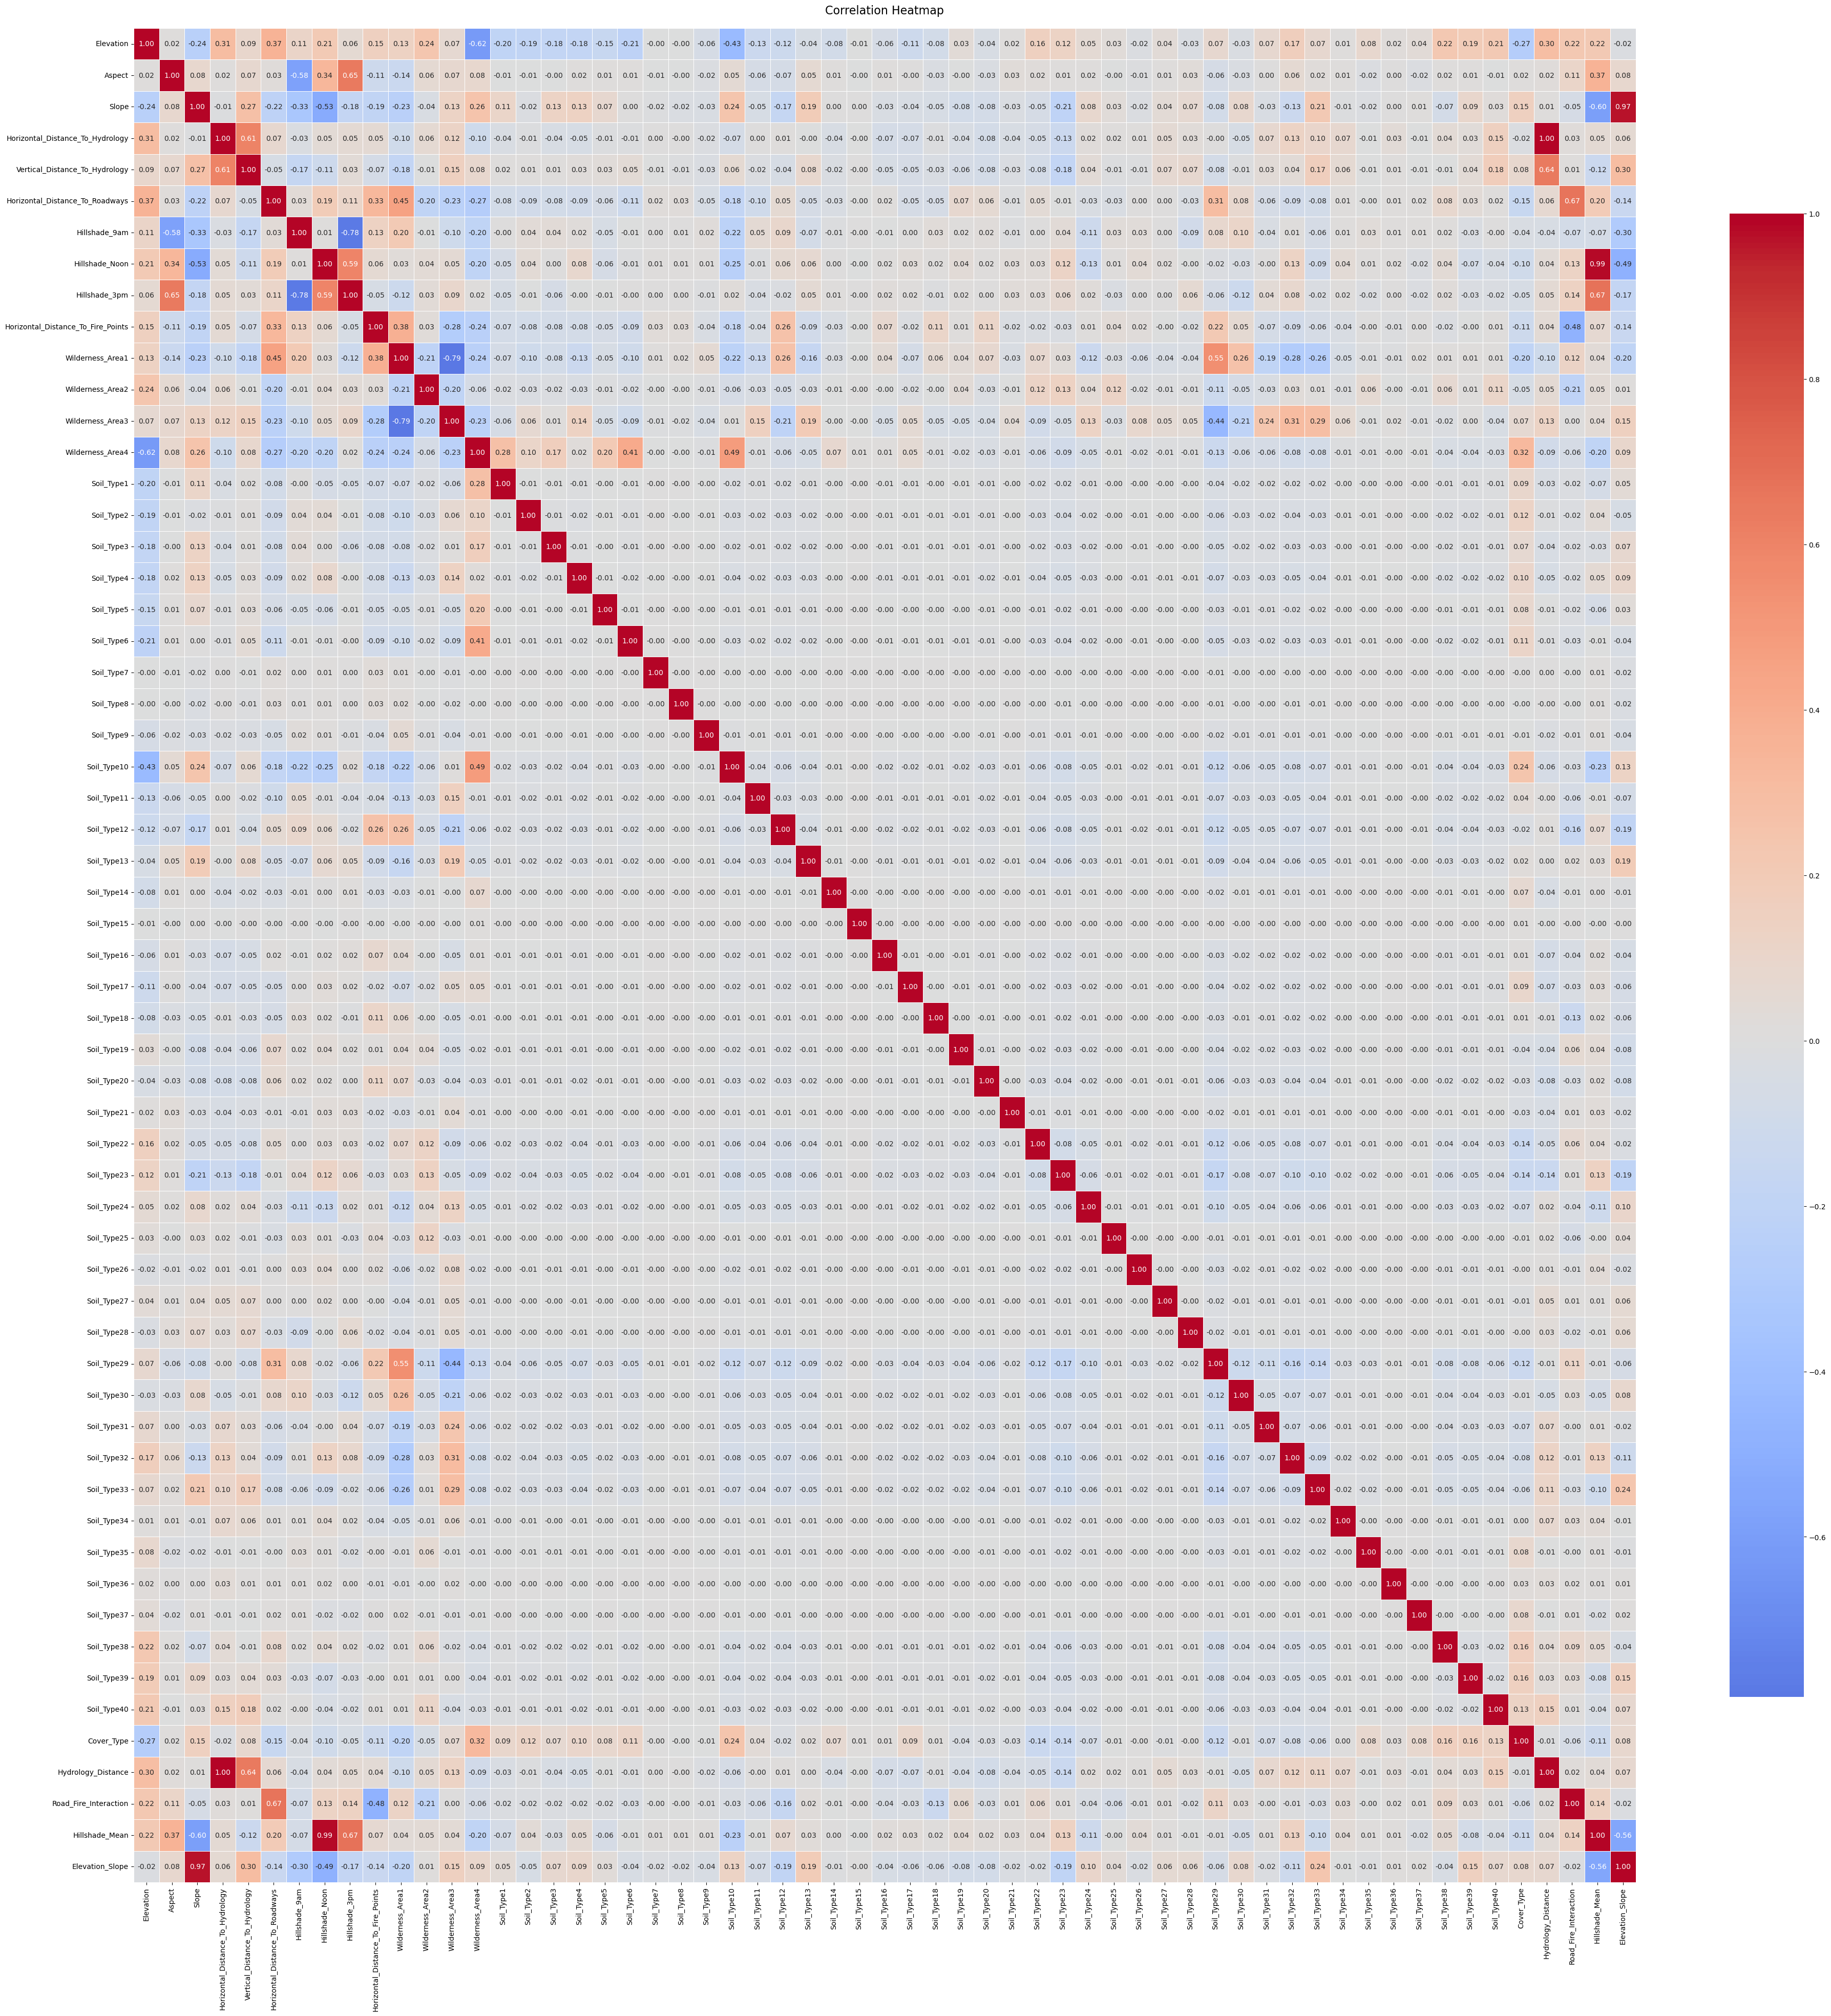

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(40, 40))
sns.heatmap(
    df.corr(),
    cmap="coolwarm",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap", fontsize=16, pad=20)

plt.tight_layout(pad=3.0)
plt.show()

### `Model Development`

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### `Multiclass Logistic Regression(Softmax Regression)`

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

X = df.drop("Cover_Type", axis=1)
y = df["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

softmax_model = Pipeline([
    ("scaler", StandardScaler()),
    ("softmax", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=500
    ))
])

softmax_model.fit(X_train, y_train)
y_pred = softmax_model.predict(X_test)

print("Softmax Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Softmax Accuracy: 0.7233634243522112
              precision    recall  f1-score   support

           1       0.71      0.70      0.70     42368
           2       0.75      0.80      0.77     56661
           3       0.68      0.80      0.74      7151
           4       0.62      0.44      0.52       549
           5       0.16      0.01      0.01      1899
           6       0.49      0.29      0.36      3473
           7       0.74      0.56      0.64      4102

    accuracy                           0.72    116203
   macro avg       0.59      0.51      0.53    116203
weighted avg       0.71      0.72      0.71    116203



### `Neural Network`

In [5]:
from sklearn.neural_network import MLPClassifier

nn_model = Pipeline([
    ("scaler", StandardScaler()),
    ("nn", MLPClassifier(
        hidden_layer_sizes=(512,256,128,64),
        activation='relu',
        solver='adam',
        max_iter=30,
        batch_size=256,
        learning_rate_init=0.001,
        random_state=42
    ))
])

nn_model.fit(X_train, y_train)
y_pred = nn_model.predict(X_test)

print("NN Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


NN Accuracy: 0.9462062081013399
              precision    recall  f1-score   support

           1       0.94      0.95      0.95     42368
           2       0.96      0.95      0.96     56661
           3       0.93      0.96      0.94      7151
           4       0.89      0.77      0.83       549
           5       0.83      0.88      0.85      1899
           6       0.91      0.87      0.89      3473
           7       0.95      0.93      0.94      4102

    accuracy                           0.95    116203
   macro avg       0.92      0.90      0.91    116203
weighted avg       0.95      0.95      0.95    116203



`Best performing Neural Network is with Accuracy` `0.9462` `with` `Activation Function` `ReLU` `&` `Learning Rate 0.001`

### `Support Vector Machine(SVM)`

In [25]:
import cudf
import cupy as cp
import random

from cuml.decomposition import PCA
from cuml.svm import SVC
from cuml.preprocessing import StandardScaler
from cuml.model_selection import train_test_split
from cuml.metrics import accuracy_score

import numpy as np


In [ ]:
gdf = cudf.read_csv("https://drive.google.com/uc?export=download&id=1gmiFCYLkRJYKOlLaUOWK0obUnWj95dY7")
X = gdf.drop("Cover_Type", axis=1)
y = gdf["Cover_Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### `Hyperparameter tuning`

In [4]:
pca_range = [20, 30, 40, 50]
C_range = [0.1, 1, 5, 10, 20, 50]
gamma_range = [0.001, 0.01, 0.05, 0.1, 0.2]

n_iterations = 20
results = []


In [ ]:
for i in range(n_iterations):
    n_comp = random.choice(pca_range)
    C_val = random.choice(C_range)
    gamma_val = random.choice(gamma_range)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n_comp)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    svm = SVC(kernel="rbf", C=C_val, gamma=gamma_val)

    svm.fit(X_train_pca, y_train)
    y_pred = svm.predict(X_test_pca)

    acc = float(accuracy_score(y_test, y_pred))

    results.append((n_comp, C_val, gamma_val, acc))

    print(f"[{i+1}/{n_iterations}] PCA={n_comp}, C={C_val}, gamma={gamma_val} → Accuracy={acc:.4f}")

[1/20] PCA=30, C=10, gamma=0.1 → Accuracy=0.8419
[2/20] PCA=50, C=50, gamma=0.05 → Accuracy=0.8769
[3/20] PCA=50, C=1, gamma=0.1 → Accuracy=0.8466
[4/20] PCA=40, C=5, gamma=0.05 → Accuracy=0.8114
[5/20] PCA=20, C=10, gamma=0.05 → Accuracy=0.8197
[6/20] PCA=40, C=50, gamma=0.1 → Accuracy=0.8623
[7/20] PCA=20, C=0.1, gamma=0.2 → Accuracy=0.7843
[8/20] PCA=30, C=20, gamma=0.1 → Accuracy=0.8505
[9/20] PCA=30, C=50, gamma=0.05 → Accuracy=0.8399
[10/20] PCA=50, C=20, gamma=0.05 → Accuracy=0.8653
[11/20] PCA=50, C=50, gamma=0.1 → Accuracy=0.9020
[12/20] PCA=30, C=1, gamma=0.1 → Accuracy=0.8078
[13/20] PCA=40, C=10, gamma=0.2 → Accuracy=0.8649
[14/20] PCA=20, C=20, gamma=0.2 → Accuracy=0.8735
[15/20] PCA=20, C=5, gamma=0.1 → Accuracy=0.8317
[16/20] PCA=50, C=50, gamma=0.05 → Accuracy=0.8769
[17/20] PCA=30, C=20, gamma=0.01 → Accuracy=0.7834
[18/20] PCA=20, C=20, gamma=0.01 → Accuracy=0.7810
[19/20] PCA=50, C=20, gamma=0.01 → Accuracy=0.8095
[20/20] PCA=50, C=5, gamma=0.01 → Accuracy=0.7929


`Best performing SVM with Accuracy` `0.9020` `with` `C = 50`, `Gamma = 0.1` & `with 50 principle components`